In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import numpy as np
import time
import pandas as pd
from tqdm import tqdm
import scipy.signal
import random

            minx          miny           maxx          maxy
0 -698116.649334  7.050026e+06 -696649.172642  7.050929e+06


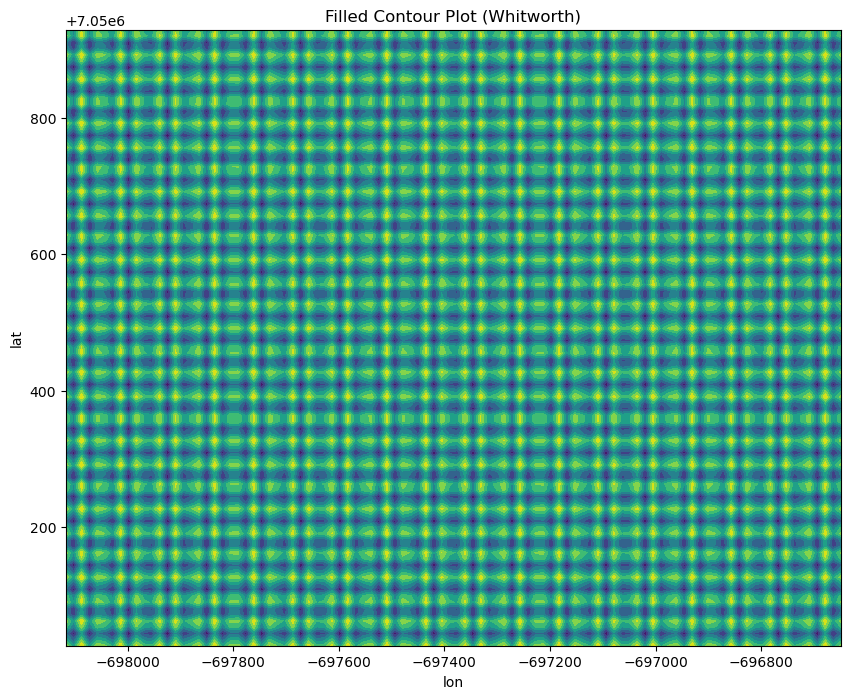

In [122]:
poly = gpd.read_file("polygons/whitworth.geojson").to_crs(3857)
#cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)
print(poly.bounds)
minx = poly.total_bounds[0]
miny = poly.total_bounds[1]
maxx = poly.total_bounds[2]
maxy = poly.total_bounds[3]

feature_x = np.linspace(minx, maxx, 100)
feature_y = np.linspace(miny, maxy, 100)

[X, Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1,1,figsize=(10,8))

Z = np.cos(X / 4) + np.sin(Y / 2) 

# contour plot
ax.contourf(X, Y, Z)
#poly.plot(ax=ax, edgecolor='black', facecolor='red')

ax.set_title('Filled Contour Plot (Whitworth)')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

plt.show()

       minx      miny      maxx       maxy
0 -6.271289  53.36085 -6.258106  53.365688


Text(0.5, 1.0, 'contourf figure with Nlevels=10')

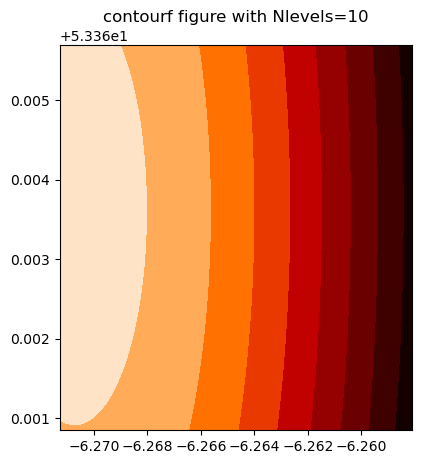

In [95]:
from shapely import geometry
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import fiona
import os,json
from descartes.patch import PolygonPatch

poly = gpd.read_file("polygons/whitworth.geojson").to_crs(4326)
#cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)
print(poly.bounds)
minx = poly.total_bounds[0]
miny = poly.total_bounds[1]
maxx = poly.total_bounds[2]
maxy = poly.total_bounds[3]

# create some test data with multiple peaks
lon = np.linspace(minx,maxx,100)
lat = np.linspace(miny,maxy,90)
long,latg=np.meshgrid(lon,lat)

C1=np.sqrt((long-np.random.uniform(minx, maxx))**2+(latg-np.random.uniform(miny, maxy))**2)/0.05
C2=np.sqrt((long-np.random.uniform(minx, maxx))**2+(latg-np.random.uniform(miny, maxy))**2)/0.025
m = np.random.uniform(minx, maxx)*np.exp(-C1**2)+np.random.uniform(miny, maxy)*np.exp(-C2**2)

# make the contourf plot, storing the resulting ContourSet in cs
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
Nlevels=10
cs = plt.contourf(lon,lat,m,Nlevels,cmap='gist_heat')
plt.title('contourf figure with Nlevels='+str(Nlevels))

           minx          miny          maxx          maxy
0 -56814.696246  6.672176e+06  37182.435377  6.744603e+06
width: 93997.13162262674
height: 72427.06358733214
std(lon) =  17161.449776831614
std(lat) =  13223.31216688095


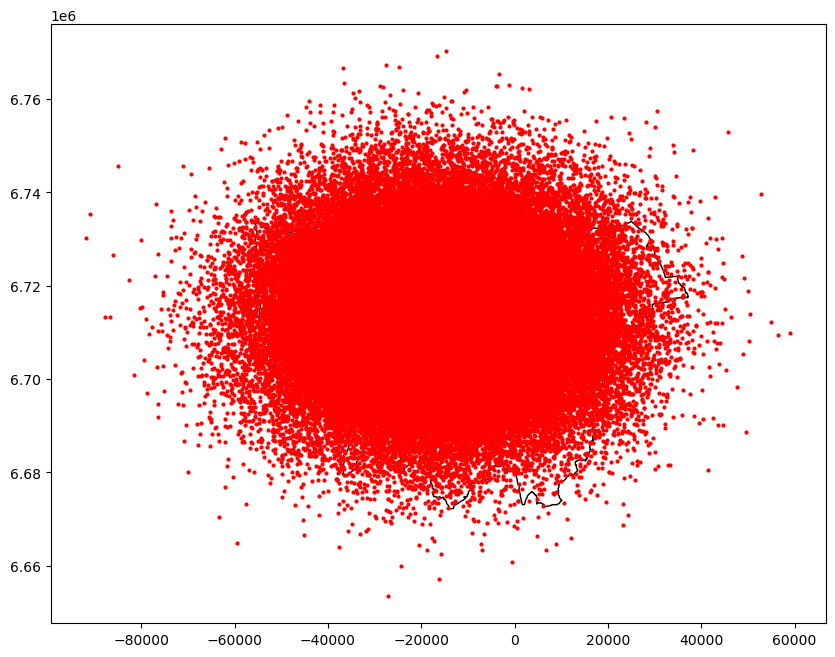

In [15]:
poly = gpd.read_file("polygons/london.geojson").to_crs(3857)
print(poly.bounds)
minx, miny, maxx, maxy = poly.total_bounds
radius_x = (maxx - minx)/8
radius_y = (maxy - miny)/16

c_x, c_y = poly.centroid.x.item(), poly.centroid.y.item()
c_rand_x = random.uniform(c_x - radius_x, c_x + radius_x)
c_rand_y = random.uniform(c_y - radius_y, c_y + radius_y)

mean = [c_x, c_y]
mean = [c_rand_x, c_rand_y]

print("width:", maxx-minx)
print("height:", maxy-miny)
var_lon = ((maxx-minx)**2)/30
var_lat = ((maxy-miny)**2)/30

print("std(lon) = ", np.sqrt(var_lon))
print("std(lat) = ", np.sqrt(var_lat))

cov = [[var_lon,1], [1, var_lat]]
lon, lat = np.random.multivariate_normal(mean, cov, 100000).T

points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lon,lat), crs=3857)

fig, ax = plt.subplots(1, figsize=(10,8))
poly.plot(ax=ax, edgecolor='black', facecolor='none')
#cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)

points.plot(ax=ax, color='red', markersize=4)

plt.show()


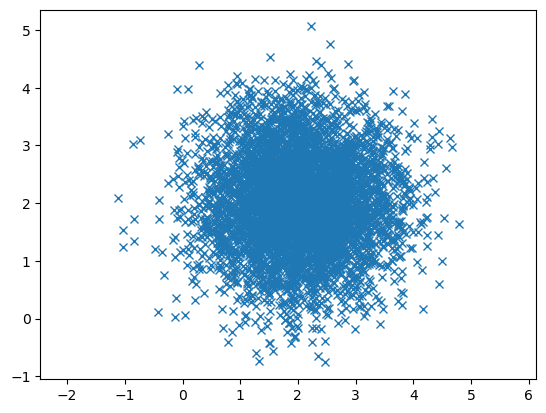

In [41]:
mean = (2, 2)
cov = np.array([[2/3, 0], [0, 2/3]])
x, y = np.random.multivariate_normal(mean, cov, 5000).T


plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

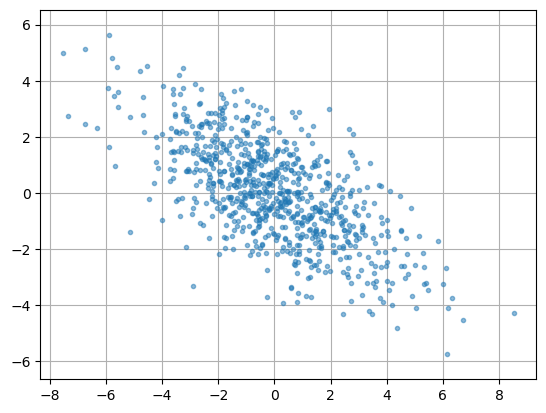

In [5]:
mean = (1, 2)
cov = np.array([[6, -3], [-3, 3.5]])
pts = np.random.multivariate_normal([0, 0], cov, size=800)

import matplotlib.pyplot as plt
plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

           minx          miny          maxx          maxy
0 -56814.696246  6.672176e+06  37182.435377  6.744603e+06


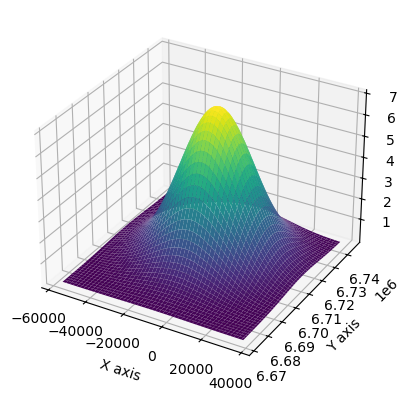

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

poly = gpd.read_file("polygons/london.geojson").to_crs(3857)
print(poly.bounds)
minx, miny, maxx, maxy = poly.total_bounds
radius_x = (maxx - minx)/8
radius_y = (maxy - miny)/16

c_x, c_y = poly.centroid.x.item(), poly.centroid.y.item()
c_rand_x = random.uniform(c_x - radius_x, c_x + radius_x)
c_rand_y = random.uniform(c_y - radius_y, c_y + radius_y)

mean = [c_x, c_y]
mean = [c_rand_x, c_rand_y]

# define parameters for x and y distributions
mu_x = c_rand_x  # mean of x
variance_x = ((maxx-minx)**2)/30
mu_y = c_rand_y  # mean of y
variance_y = ((maxy-miny)**2)/30
# define a grid for x and y values
x = np.linspace(minx, maxx, 100)  # generate 500 points between -10 and 10 for x
y = np.linspace(miny, maxy, 800)  # generate 500 points between -10 and 10 for y
X, Y = np.meshgrid(x, y)  # create a grid for (x,y) pairs
# create an empty array of the same shape as X to hold the (x, y) coordinates
pos = np.empty(X.shape + (2,))
# fill the pos array with the x and y coordinates
pos[:, :, 0] = X  
pos[:, :, 1] = Y  
# create a multivariate normal distribution using the defined parameters
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])
# create a new figure for 3D plot
fig = plt.figure()
# add a 3D subplot to the figure
ax = fig.add_subplot(projection='3d')
# create a 3D surface plot of the multivariate normal distribution
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis', linewidth=0)
# set labels for the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# display the 3D plot
plt.show()